**EDA CLASS ASSIGNMENT**

**GROUP 22**

**TOPIC:** MISSING NOS

**GROUP MEMBERS:**

Aniket Pandey (202411001)


Bhavya Boda (202203067)


Krishil Jayswal (202203040)


**Step 1:**

Loading the dataset, required libraries and getting to know key information about the Dataframe's structure.

In [3]:
import pandas as pd
import missingno as msno

df2 = pd.read_csv("https://raw.githubusercontent.com/Krishil-Jayswal/Exploratory-Data-Analysis/refs/heads/main/missingno%20Package/car_prices.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


The dataset we have used here contains 558837 tuples and 16 features.

In [5]:
df2.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


**Step 2:**

Counting the total elements with null value (or) missing values in each column of the dataset.

In [6]:
df2.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


**Step 3:**

Plotting the pertinent graphs representing the missing values in the dataset with the help of "missingno" functions:

1) BAR GRAPH



<Axes: >

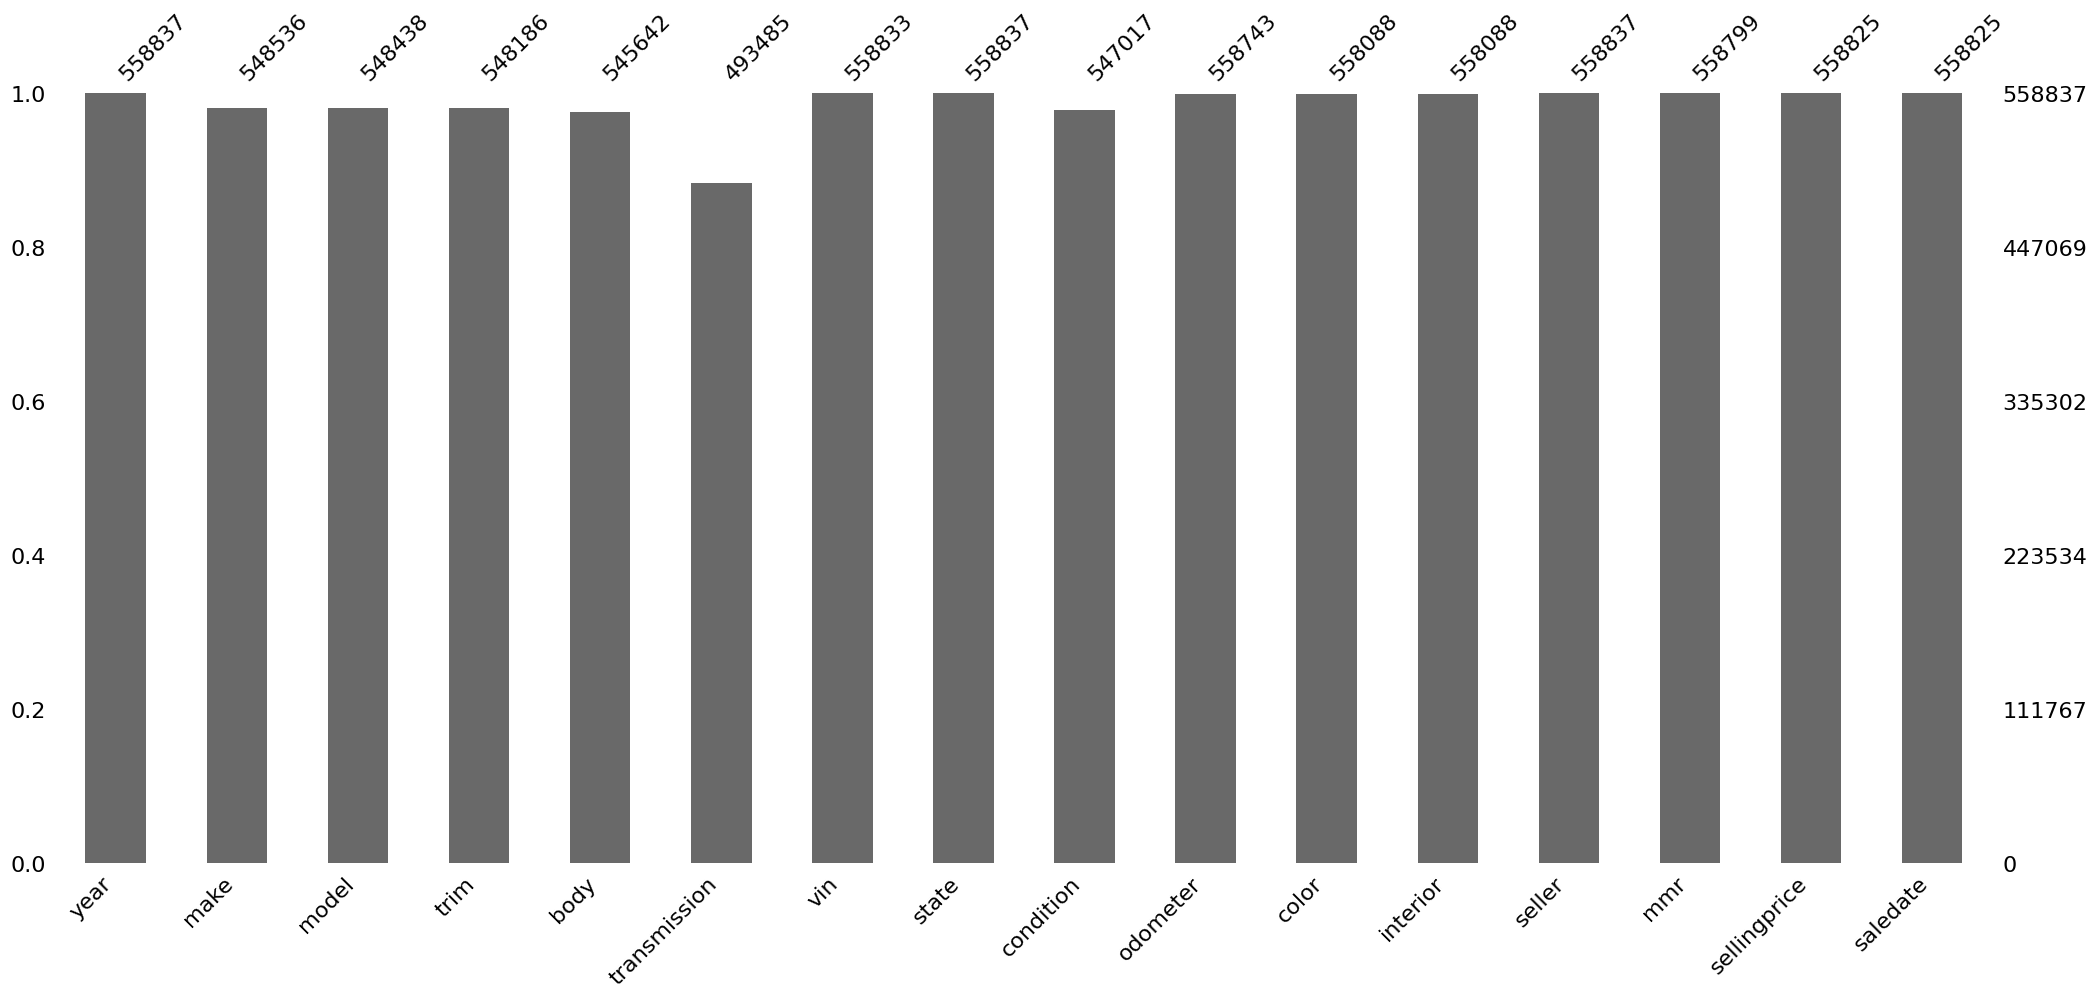

In [7]:
msno.bar(df2)

1. On the left side of the plot, the y-axis scale ranges from 0.0 to 1.0, where
   1.0 represents 100% data completeness.
2. If the bar is less than this, it indicates that we have missing values within that column.
3. On the right side of the plot, the scale is measured in index values.
4. Top right represents the maximum number of rows within the dataframe.
On the top of the plot, there are a series of numbers that represent the total count of the non-null values within that column.

**OBSERVATIONS:**

As we can observe from the bar graph, the column "transmission" has the most number of missing values while the columns "year", "state" and "seller" have no missing values.

Determining the type of missing values (MCAR or MAR) is not probable from a bar graph.

2) MATRIX PLOT

<Axes: >

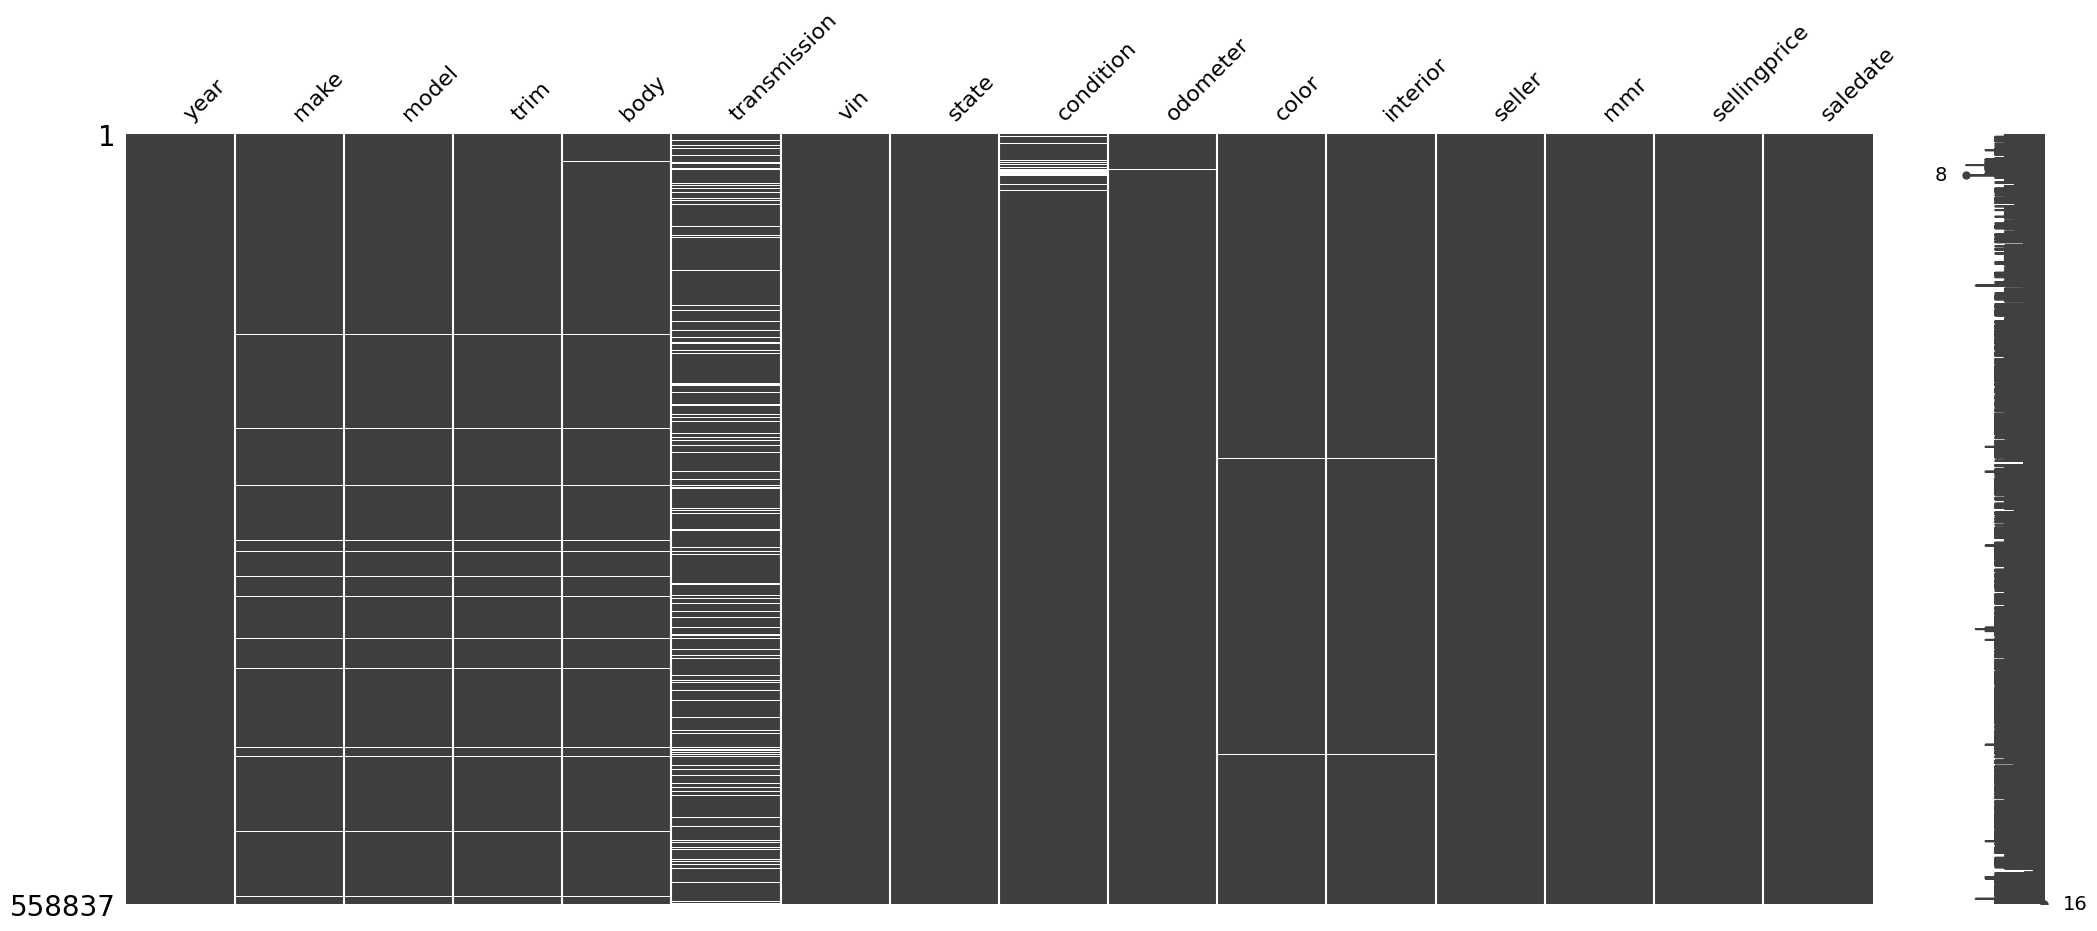

In [8]:
msno.matrix(df2)

1. The plot appears white wherever there are missing values.
2. The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum
nullities and the total number of columns in a given dataset, at the bottom.
3. When a row has a value in each column, the line will be at the maximum right position. As missing values start to increase within that row
the line will move towards the left.

**OBSERVATIONS:**

1. It is immediately clear that the missing data is not randomly distributed across the dataset. There are distinct patterns of missingness in specific columns and potential relationships between missing values in different columns.

2. Certain columns exhibit a substantial proportion of missing values, suggesting potential issues with data collection or recording for those specific features.

3. The presence of blocks or patterns of missingness that span multiple columns hints at potential dependencies between the missingness of different features. This suggests that the missingness of one variable might be informative about the missingness of another.

Can we find MCAR or MAR?

**MCAR (Missing Completely at Random)** is unlikely based on the observed patterns. If the data were MCAR, we would expect the missing values to be scattered randomly throughout the dataset, with no discernible patterns.

**MAR (Missing at Random)** is more plausible. The apparent dependencies between missing values in different columns suggest that the missingness of a variable might be predictable from other observed variables in the dataset.


3) HEATMAP

<Axes: >

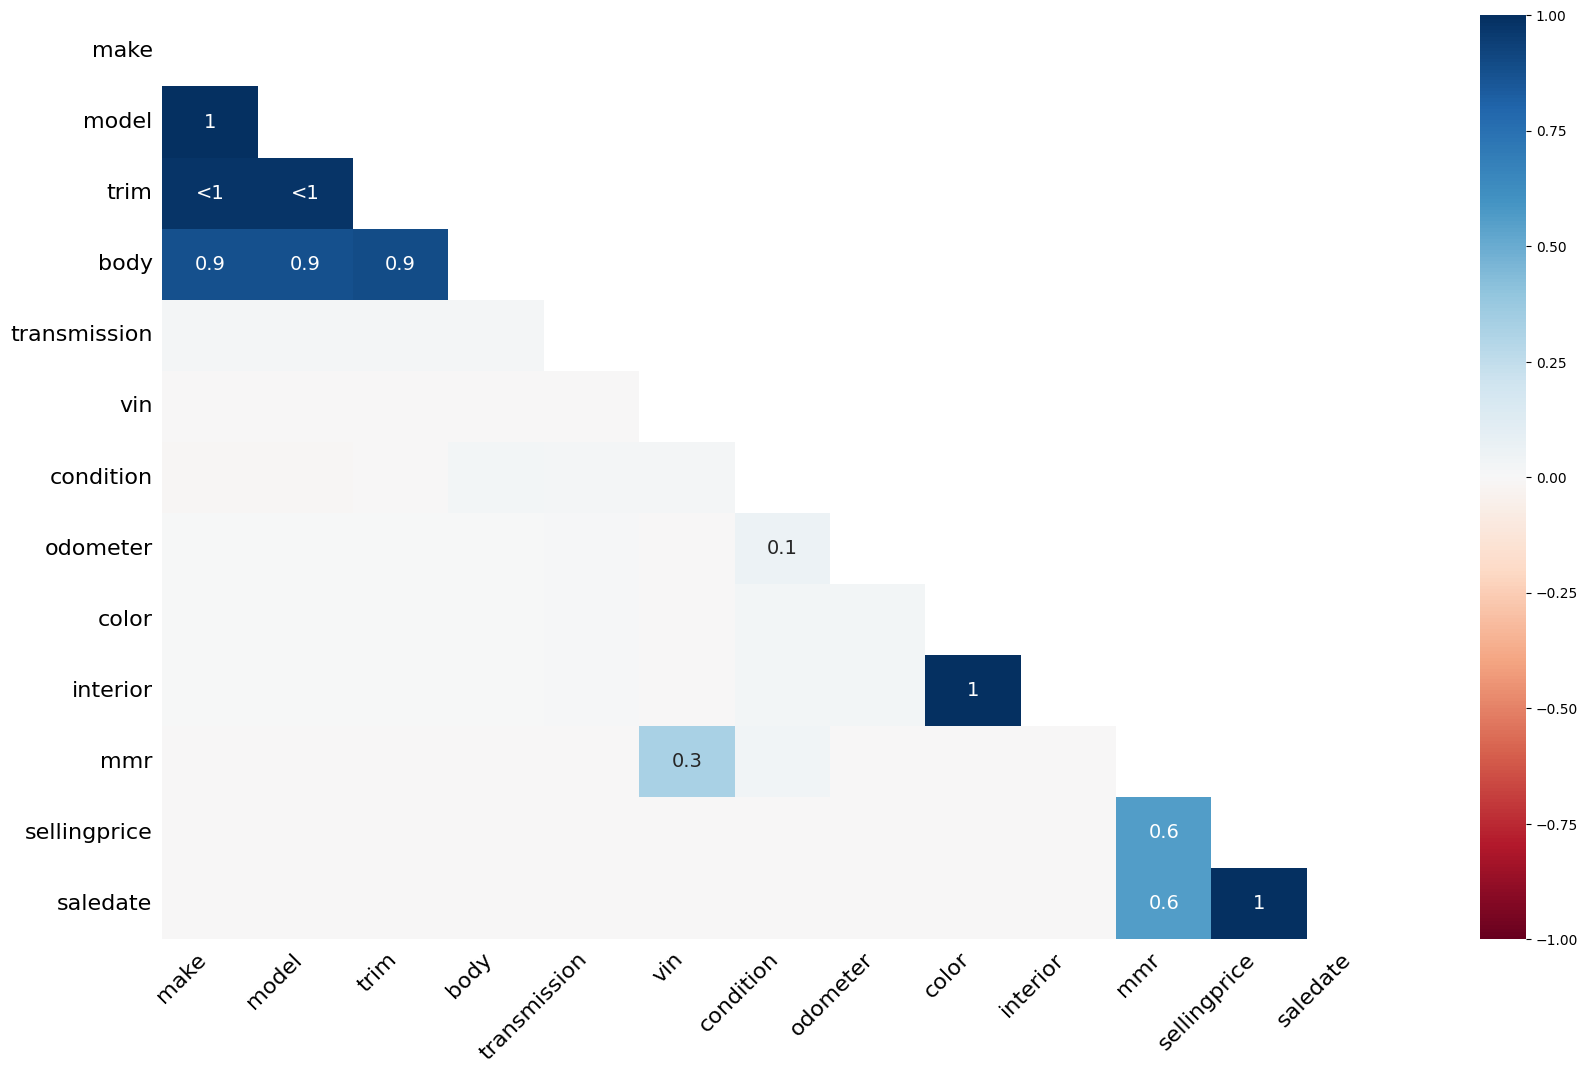

In [9]:
msno.heatmap(df2)

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if
there is a relationship in the presence of null values between each of the columns. The heatmap approach is more suitable for smaller datasets.

1. Values close to +1 indicate that the presence of null values in one column is correlated with the presence of null values in another
column.
2. Values close to -1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another
column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
3. Values close to 0 indicate there is little to no relationship between the presence of null values in one column compared to another.
4. If there are a number of values that show as <-1, this indicates that the correlation is very close to being 100% negative.

**OBSERVATIONS:**

1. The heatmap reveals patterns of correlated missingness between certain variables. For example, "make", "mode", and "trim" seem to have a high degree of missingness together. This suggests that the missingness of one of these variables might be related to the missingness of the others.

2. Some features, like "odometer" and "mmr", appear to have missing values independently of other variables. This could indicate a different mechanism causing their missingness.

3. Features like "year", "state" and "seller" are not present in this graph since they have no missing values.



Can we find MCAR or MAR?

**MCAR:** The presence of correlated missingness patterns suggests that MCAR is unlikely. If the data were MCAR, we would expect the missing values to be randomly distributed across all variables, with no discernible patterns.

**MAR:** The observed patterns of correlated missingness are more consistent with MAR. The missingness of certain variables seems to be dependent on the values or missingness of other variables in the dataset.For example, "make", "mode","trim" and "body".


4) DENDROGRAM

<Axes: >

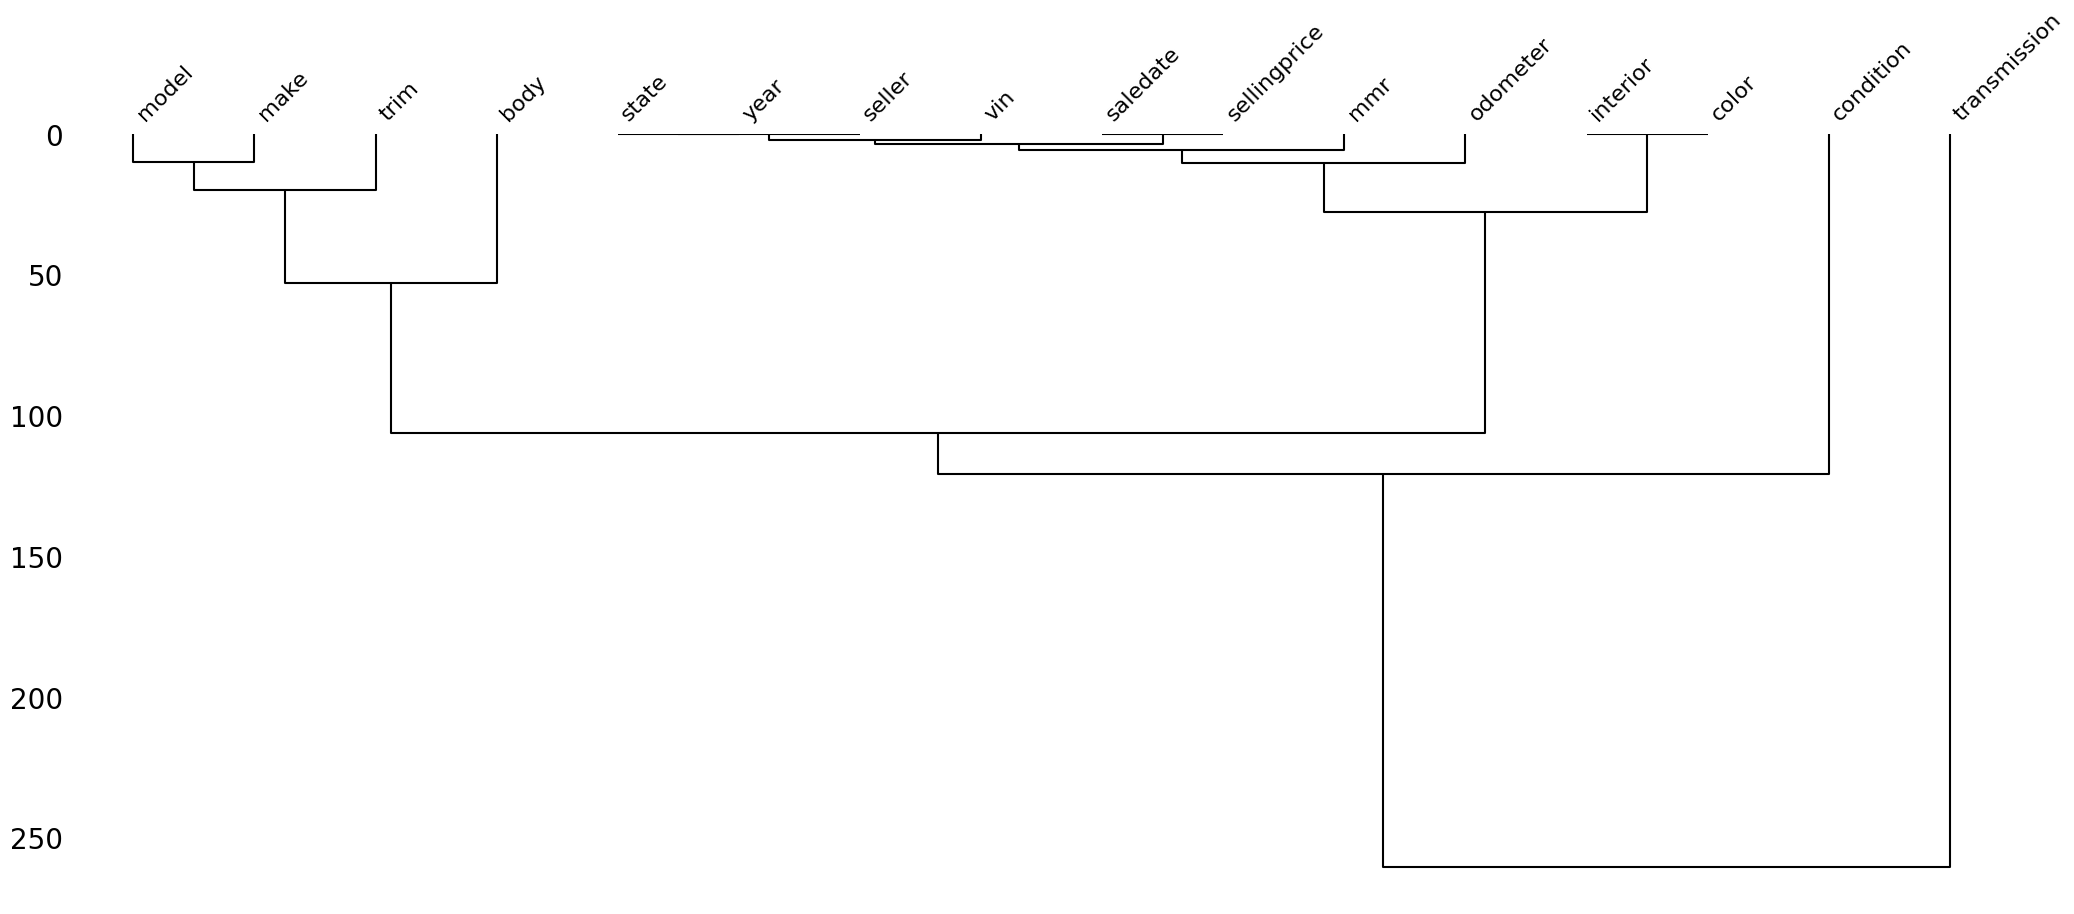

In [10]:
msno.dendrogram(df2)

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong
correlations in nullity.

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence
or absence of nulls in the others columns.

The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

**OBSERVATIONS:**

1. The dendrogram reveals the presence of distinct clusters of variables with similar missingness patterns. This suggests potential dependencies or relationships between the missingness of these variables.

2. We can observe that "state", "year" and "seller" are clustered together, since they have no missing values

3. Some clusters like "model","make","trim" and "body" or "mmr","selling price" and "saledate" are relatively small, indicating a strong association between a few specific variables (MAR), while others are larger like "transmission" and "condition", suggesting a broader pattern of missingness across multiple variables.(MCAR)

4. The height of the branches connecting clusters provides a measure of dissimilarity in their missingness patterns. Longer branches indicate greater dissimilarity.

